# 데이터 분포 보기


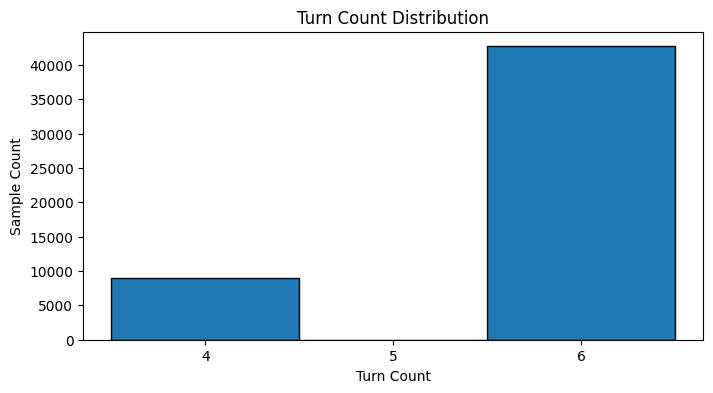

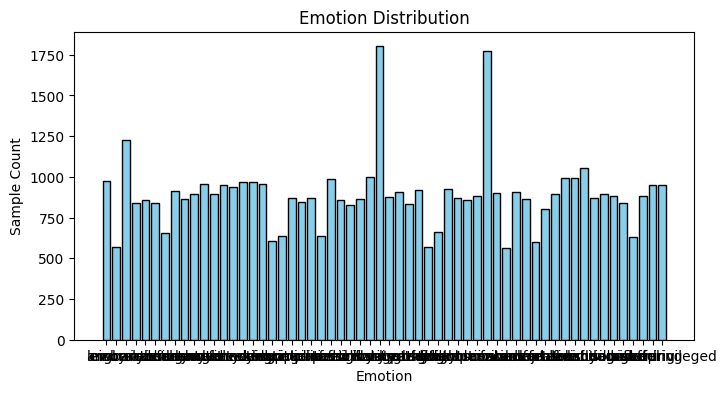

In [6]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# 데이터 파일 경로 지정
jsonl_path = "./training.jsonl"

turn_counts = []
emotions = []

# 데이터 로딩 및 분포 정보 수집
with open(jsonl_path, "r", encoding="utf-8") as f:
    for line in f:
        d = json.loads(line)
        # 턴 개수
        turn_counts.append(len(d.get("turns", [])))
        # 감정 정보
        emotions.append(d.get("emotion", "unknown"))

# 턴 개수 분포 시각화
plt.figure(figsize=(8,4))
plt.hist(turn_counts, bins=range(min(turn_counts), max(turn_counts)+2), edgecolor='black', align="left")
plt.xlabel("Turn Count")
plt.ylabel("Sample Count")
plt.title("Turn Count Distribution")
plt.xticks(range(min(turn_counts), max(turn_counts)+1))
plt.show()

# 감정 분포 시각화
emotion_counter = Counter(emotions)
plt.figure(figsize=(8,4))
plt.bar(emotion_counter.keys(), emotion_counter.values(), color="skyblue", edgecolor="black")
plt.xlabel("Emotion")
plt.ylabel("Sample Count")
plt.title("Emotion Distribution")
plt.show()


# 각 감정별 VAD 분포 보기

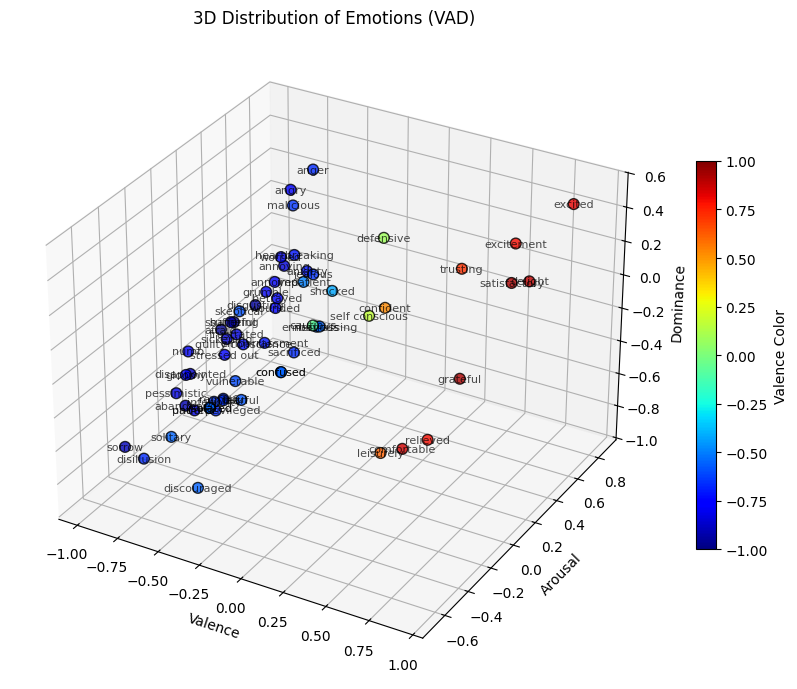

In [12]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# emotions.tsv 파일에서 감정-영어명-VAD 매핑 읽기
emotions_tsv_path = "../raw/metadata/emotions.tsv"  # 상대 경로 주의

# TSV 파일 읽기
df = pd.read_csv(emotions_tsv_path, sep='\t')

# 3D Plot 시각화
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# 각 감정의 영어 단어를 라벨로, 색상 변화 위해 colormap 사용
from matplotlib import cm
from matplotlib.colors import Normalize

# 표준화된 VAD (값 편차 고려한 시각화)
norm = Normalize(vmin=-1, vmax=1)

# valence, arousal, dominance 좌표 & 감정 영어단어 추출
valence = df['valence'].astype(float)
arousal = df['arousal'].astype(float)
dominance = df['dominance'].astype(float)
labels = df['en']

# 컬러맵 (예: valence 기반으로 색상 지정)
colors = cm.jet(norm(valence))

# 산점도
sc = ax.scatter(valence, arousal, dominance, c=colors, s=60, edgecolor='k', alpha=0.8)

# 각 점에 감정명(영어) 라벨링
for xv, yv, zv, label in zip(valence, arousal, dominance, labels):
    ax.text(xv, yv, zv, label, fontsize=8, ha='center', va='center', alpha=0.7)

ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
ax.set_title('3D Distribution of Emotions (VAD)')

# 컬러바 추가 (valence 기준)
mappable = cm.ScalarMappable(norm=norm, cmap=cm.jet)
mappable.set_array(valence)
cbar = plt.colorbar(mappable, ax=ax, shrink=0.6, pad=0.04)
cbar.set_label('Valence Color')

plt.tight_layout()
plt.show()
